<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Multiple_Response_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me

Good Resources:
1. http://varianceexplained.org/r/stacksurveyr/ [1]

2. https://github.com/dgrtwo/stacksurveyr [2]


In short: 

1. Categorize each question as one of the three:

*   single columns have a single answer on a multiple choice question

*   multi columns allowed multiple answers, which are delimited by ; in the text

*   inferred columns are not themselves survey questions, but are processed versions of other answers


2. Explore <Examples: Multi-response answers> in [2]


# Version History



*   v01: Copy Paste from the Original Source
*   v02: 



## Setup

In [2]:
install.packages('devtools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
devtools::install_github("dgrtwo/stacksurveyr",upgrade = "never")

✔  checking for file ‘/tmp/RtmpXBN1m0/remotes3b3399e048/dgrtwo-stacksurveyr-633cf35/DESCRIPTION’
─  preparing ‘stacksurveyr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘stacksurveyr_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(dplyr)
library(stacksurveyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
library(ggplot2)
library(scales)


10 of the questions allow multiple responses, as can be noted in the stack_schema variable:

In [7]:
stack_schema %>%
  filter(type == "multi")

column,type,question,description
<chr>,<chr>,<chr>,<chr>
self_identification,multi,What do you consider yourself? (select all that apply),NA
tech_do,multi,Which of the following languages or technologies have you done extensive development with in the last year? (select all that apply),NA
tech_want,multi,Which of the following languages or technologies do you WANT to work with this year? (select all that apply),NA
dev_environment,multi,What development environments do you use regularly? (select all that apply),NA
education,multi,What amount of formal or professional programming training have you received? (select all that apply),NA
new_job_value,multi,When evaluating a new employment opportunity what's most important to you? (select up to 3),NA
how_to_improve_interview_process,multi,How can companies improve the interview process? (select up to 3),NA
star_wars_vs_star_trek,multi,Star Wars or Star Trek?,NA
developer_challenges,multi,What are the biggest challenges you face as a developer? (select up to 3),NA


In these cases, the responses are given delimited by ; . For example, see the tech_do column (""Which of the following languages or technologies have you done extensive development with in the last year?"):

In [8]:
stack_survey %>%
  filter(!is.na(tech_do)) %>%
  select(tech_do)

tech_do
<chr>
iOS; Objective-C
"Android; Arduino / Raspberry Pi; AngularJS; C; C++; C#; Cassandra; CoffeeScript; Cordova; Clojure; Cloud (AWS, GAE, Azure, etc.); Dart; F#; Go; Hadoop; Haskell; iOS; Java; JavaScript; LAMP; Matlab; MongoDB; Node.js; Objective-C; Perl; PHP; Python; R; ReactJS; Redis; Ruby; Rust; Salesforce; Scala; SharePoint; Spark; SQL; SQL Server; Swift; Visual Basic; Windows Phone; WordPress"
JavaScript; PHP; SQL; WordPress
PHP
Arduino / Raspberry Pi; C; C++; Java; JavaScript; LAMP; PHP; SQL
Android; Cordova; MongoDB; PHP; SQL; WordPress
C#; Dart; Java; JavaScript; LAMP; PHP; SQL; SQL Server; Visual Basic; WordPress
Java; JavaScript; LAMP; PHP; SQL; SQL Server
"Android; C++; C#; Cloud (AWS, GAE, Azure, etc.); Python; SQL Server"


Often, these columns are easier to work with and analyze when they are "unnested" into one user-answer pair per row. The package provides the stack_multi function as a shortcut for that unnestting:

In [9]:
stack_multi("tech_do")

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


respondent_id,column,answer
<int>,<chr>,<chr>
4637,tech_do,iOS
4637,tech_do,Objective-C
31743,tech_do,Android
31743,tech_do,Arduino / Raspberry Pi
31743,tech_do,AngularJS
31743,tech_do,C
31743,tech_do,C++
31743,tech_do,C#
31743,tech_do,Cassandra


For example, we could find the most common answers:

In [10]:
stack_multi("tech_do") %>%
  count(tech = answer, sort = TRUE)

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


tech,n
<chr>,<int>
JavaScript,27385
SQL,21976
Java,17942
C#,15283
PHP,12780
Python,12282
C++,9589
SQL Server,9306
AngularJS,8823


We can join this with the stack_survey dataset using the respondent_id column. For example, we could look at the most common development technologies used by data scientists:

In [11]:
stack_survey %>%
  filter(occupation == "Data scientist") %>%
  inner_join(stack_multi("tech_do"), by = "respondent_id") %>%
  count(answer, sort = TRUE)

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”


answer,n
<chr>,<int>
Python,507
SQL,356
R,352
Java,240
JavaScript,207
C++,155
C,125
Hadoop,108
SQL Server,98


Or we could find out the average age and salary of people using each technology, and compare them:

Warning message:
“`summarise_each_()` was deprecated in dplyr 0.7.0.
Please use `across()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(answer))`, with `mutate()` if needed”
Joining, by = "respondent_id"

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


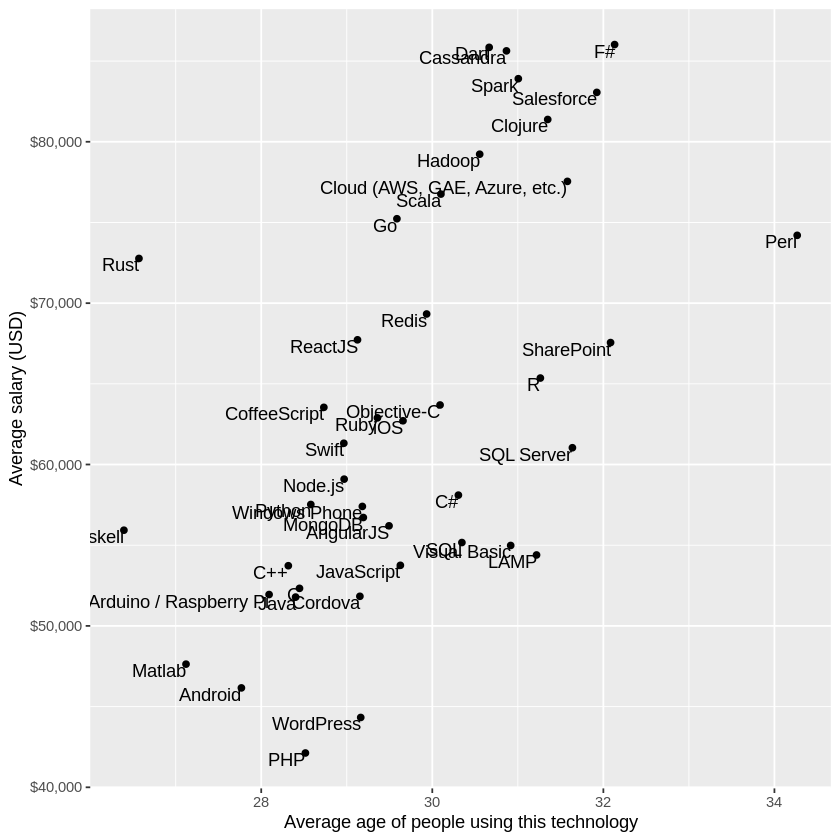

In [12]:
stack_survey %>%
  inner_join(stack_multi("tech_do")) %>%
  group_by(answer) %>%
  summarize_each(funs(mean(., na.rm = TRUE)), age_midpoint, salary_midpoint) %>%
  ggplot(aes(age_midpoint, salary_midpoint)) +
  geom_point() +
  geom_text(aes(label = answer), vjust = 1, hjust = 1) +
  xlab("Average age of people using this technology") +
  ylab("Average salary (USD)") +
  scale_y_continuous(labels = dollar_format())